In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### load dataset

In [2]:
data = pd.read_csv("IPL.csv")
data.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [4]:
data.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

In [5]:
data.duplicated().sum()

np.int64(0)

### Step 1 IPL intro

In [6]:
data['date'] = pd.to_datetime(data['date'],format = "%B %d,%Y")
start_date = data['date'].min()
end_date = data['date'].max()
print(f'IPL 2022 Duration :')
print(f'\tStart Date = {start_date.date()}')
print(f'\tEnd Date = {end_date.date()}')

total_days = (end_date - start_date).days

print(f'\tTotal Days = {total_days}')

print(f'Total Match Played = {len(data)}')

IPL 2022 Duration :
	Start Date = 2022-03-26
	End Date = 2022-05-29
	Total Days = 64
Total Match Played = 74


In [7]:
data['stage'].value_counts()

stage
Group      70
Playoff     3
Final       1
Name: count, dtype: int64

## step 2  Venue stats

In [8]:
ven = data['venue'].value_counts()
ven

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

C:\Users\afaqu\AppData\Local\Temp\ipykernel_8576\3474878962.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = ven.index, x = ven.values, palette="bright")


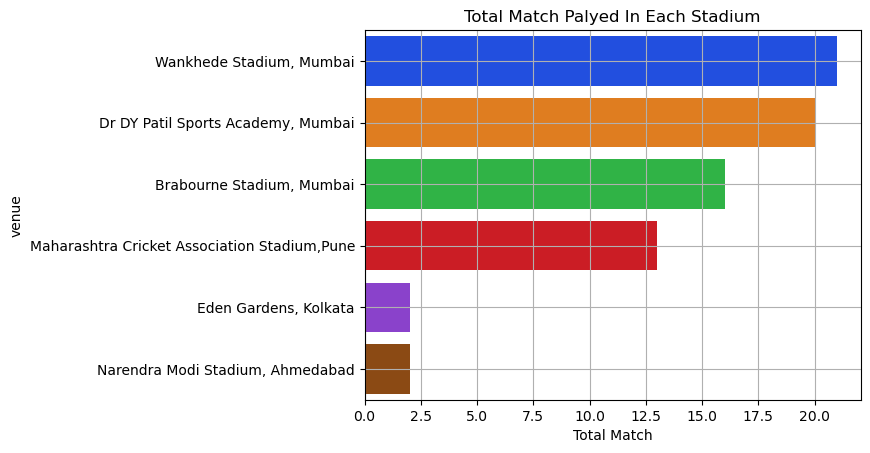

In [9]:
sns.barplot(y = ven.index, x = ven.values, palette="bright")
plt.title("Total Match Palyed In Each Stadium")
plt.xlabel("Total Match")
plt.grid(True)
plt.show()

In [10]:
stadium_data = data.groupby('venue')['first_ings_score'].agg(
    High_score = 'max', 
    Low_score = 'min', 
    Avg_Score = 'mean'
)
stadium_data

,High_score,Low_score,Avg_Score
venue,,,
"Brabourne Stadium, Mumbai",217,68,177.250000
"Dr DY Patil Sports Academy, Mumbai",216,128,170.700000
"Eden Gardens, Kolkata",207,188,197.500000
"Maharashtra Cricket Association Stadium,Pune",210,144,171.461538
"Narendra Modi Stadium, Ahmedabad",157,130,143.500000
"Wankhede Stadium, Mumbai",222,97,166.761905


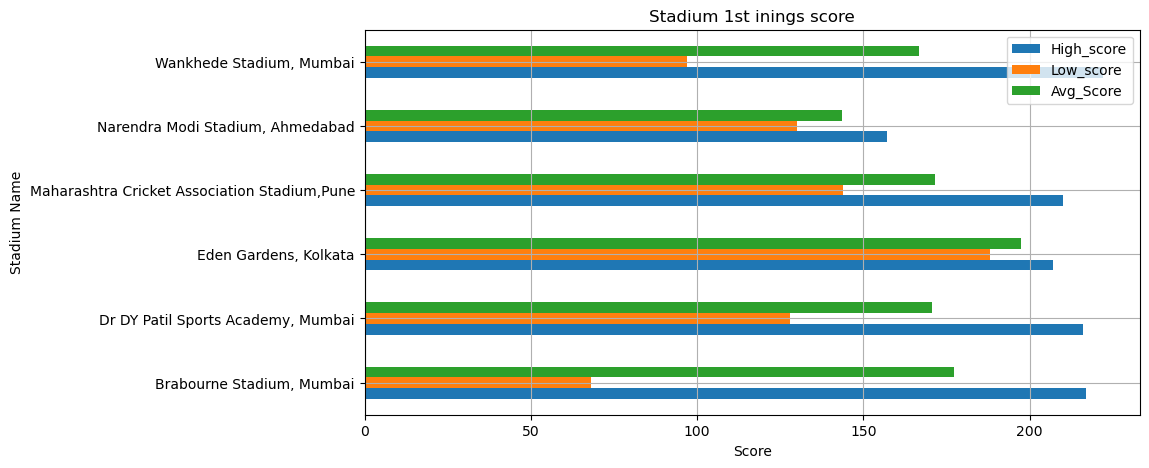

In [11]:
stadium_data.plot(kind='barh', figsize=(10,5))
plt.title("Stadium 1st inings score")
plt.ylabel('Stadium Name')
plt.xlabel('Score')
plt.grid(True)
plt.show()

In [12]:
stadium_data2 = data.groupby('venue')['second_ings_score'].agg(
    High_score = 'max', 
    Low_score = 'min', 
    Avg_Score = 'mean'
)
stadium_data2

,High_score,Low_score,Avg_Score
venue,,,
"Brabourne Stadium, Mumbai",211,72,164.187500
"Dr DY Patil Sports Academy, Mumbai",208,113,157.950000
"Eden Gardens, Kolkata",193,191,192.000000
"Maharashtra Cricket Association Stadium,Pune",189,82,144.538462
"Narendra Modi Stadium, Ahmedabad",161,133,147.000000
"Wankhede Stadium, Mumbai",207,103,161.380952


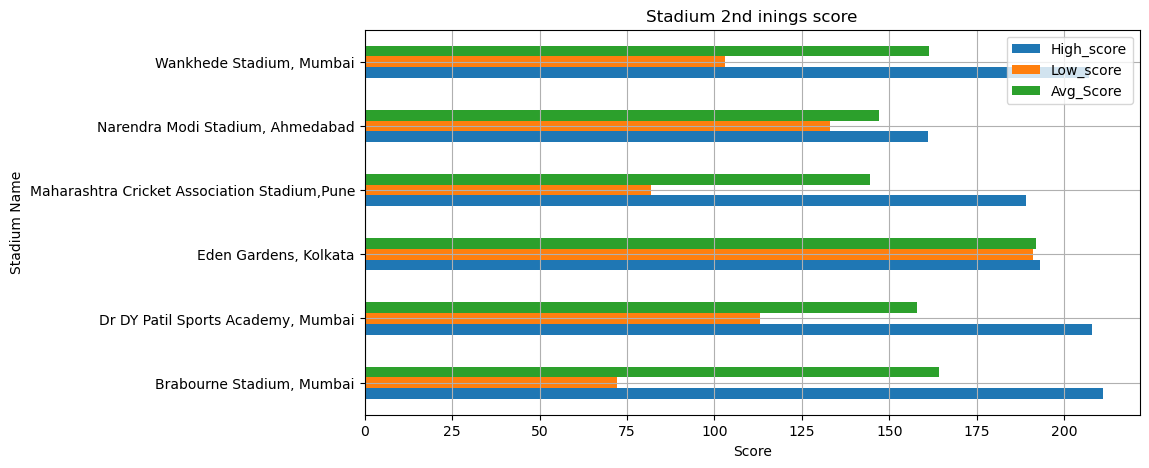

In [13]:
stadium_data2.plot(kind='barh', figsize=(10,5))
plt.title("Stadium 2nd inings score")
plt.ylabel('Stadium Name')
plt.xlabel('Score')
plt.grid(True)
plt.show()

In [15]:
data.groupby(['venue', 'match_winner'])['match_winner'].count()

venue                                         match_winner
Brabourne Stadium, Mumbai                     Delhi           4
                                              Gujarat         2
                                              Hyderabad       2
                                              Lucknow         2
                                              Mumbai          1
                                              Punjab          2
                                              Rajasthan       3
Dr DY Patil Sports Academy, Mumbai            Banglore        2
                                              Chennai         3
                                              Delhi           2
                                              Gujarat         2
                                              Hyderabad       3
                                              Kolkata         1
                                              Lucknow         3
                                             

## Team names

In [163]:
teams = pd.concat([data['team1'],data['team2']]).unique()
pd.Series(teams)

0      Chennai
1        Delhi
2     Banglore
3      Gujarat
4    Hyderabad
5      Kolkata
6       Mumbai
7      Lucknow
8       Punjab
9    Rajasthan
dtype: object

In [230]:
scores = pd.DataFrame({
    'team' : pd.concat([data['team1'], data['team2']], ignore_index=True), 
    'score': pd.concat([data['first_ings_score'], data['second_ings_score']], ignore_index=True)
})

top10_HS_by_team = scores.sort_values(by = 'score', ascending=False).head(10)
top10_HS_by_team

,team,score
33,Delhi,222
29,Kolkata,217
21,Banglore,216
18,Delhi,215
80,Lucknow,211
4,Hyderabad,210
103,Rajasthan,210
65,Kolkata,210
6,Chennai,210
59,Banglore,209


C:\Users\afaqu\AppData\Local\Temp\ipykernel_25496\3009300730.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="team", y="score", data=top10_HS_by_team, palette="viridis")


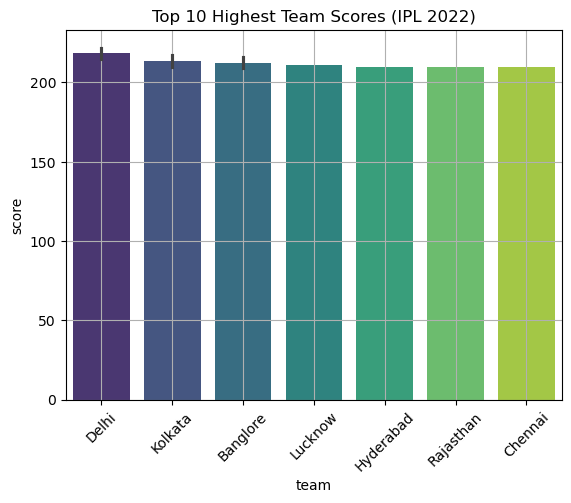

In [231]:
sns.barplot(x="team", y="score", data=top10_HS_by_team, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Highest Team Scores (IPL 2022)")
plt.grid(True)
plt.show()

In [232]:
least10_HS_by_team = scores.sort_values(by= 'score').head(10)
least10_HS_by_team

,team,score
35,Banglore,68
109,Hyderabad,72
130,Gujarat,82
58,Chennai,97
126,Lucknow,101
132,Mumbai,103
129,Mumbai,113
31,Delhi,115
112,Rajasthan,115
128,Delhi,117


C:\Users\afaqu\AppData\Local\Temp\ipykernel_25496\994264005.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="team", y="score", data=least10_HS_by_team, palette="viridis")


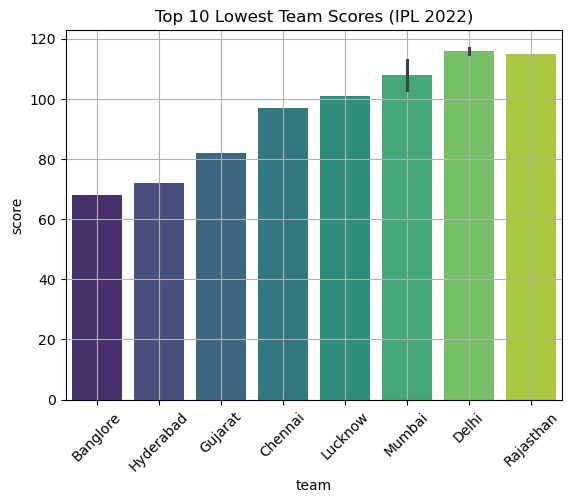

In [233]:
sns.barplot(x="team", y="score", data=least10_HS_by_team, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Lowest Team Scores (IPL 2022)")
plt.grid(True)
plt.show()

In [234]:
Team_Score = scores.groupby('team')['score'].agg(
    High_Score = 'max',
    Low_Score = 'min',
    Avg_Score = 'mean'
)
Team_Score

,High_Score,Low_Score,Avg_Score
team,,,
Banglore,216,68,170.437500
Chennai,210,97,166.357143
Delhi,222,115,168.928571
Gujarat,195,82,161.250000
Hyderabad,210,72,166.142857
Kolkata,217,123,160.785714
Lucknow,211,101,169.666667
Mumbai,198,103,160.642857
Punjab,208,119,158.714286


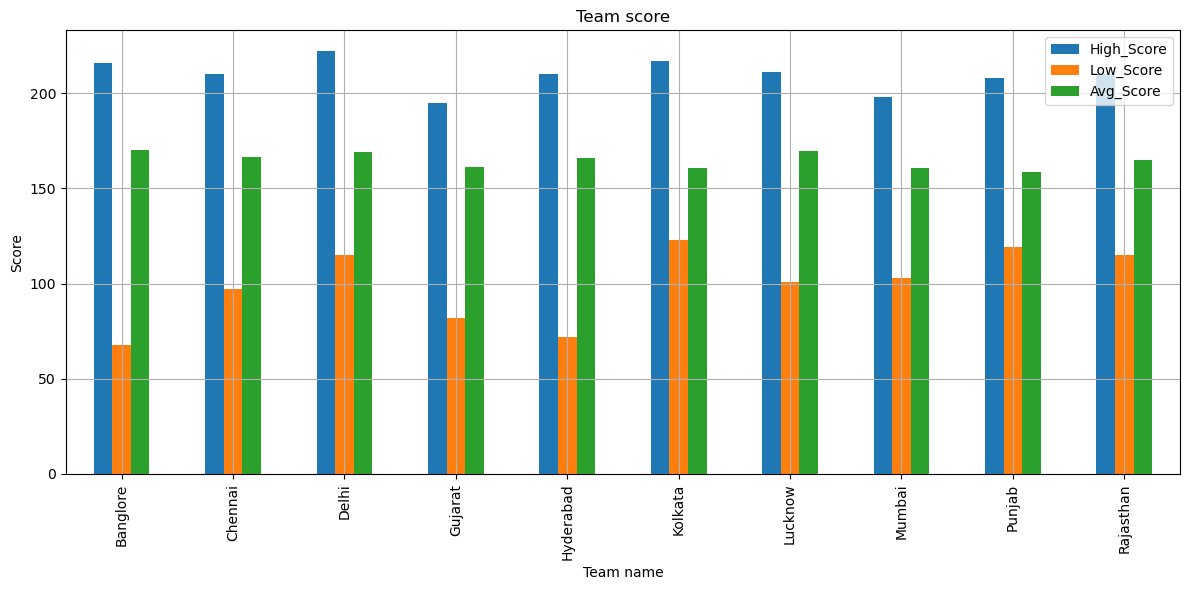

In [235]:
Team_Score.plot(kind='bar', figsize=(12,6))
plt.title("Team score")
plt.xlabel('Team name')
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()

## Toss Dicision Trends

In [164]:
Toss_Winner = data.groupby('toss_winner').size().sort_values()
Toss_Winner

toss_winner
Rajasthan     4
Punjab        4
Chennai       6
Lucknow       7
Kolkata       8
Banglore      8
Delhi         8
Mumbai        9
Hyderabad    10
Gujarat      10
dtype: int64

C:\Users\afaqu\AppData\Local\Temp\ipykernel_25496\3448229339.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = Toss_Winner.index, y = Toss_Winner.values, palette='pastel')


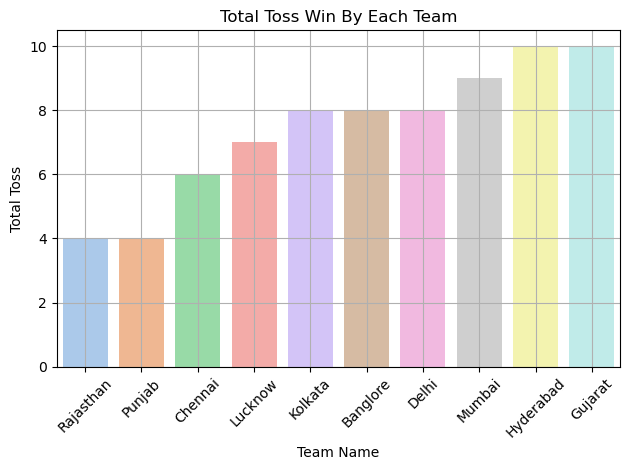

In [165]:
sns.barplot(x = Toss_Winner.index, y = Toss_Winner.values, palette='pastel')
plt.title("Total Toss Win By Each Team")
plt.xlabel("Team Name")
plt.xticks(rotation = 45)
plt.ylabel("Total Toss")
plt.tight_layout()
plt.grid(True)
plt.show()

In [166]:
toss_count = data['toss_decision'].value_counts()
toss_count

toss_decision
Field    59
Bat      15
Name: count, dtype: int64

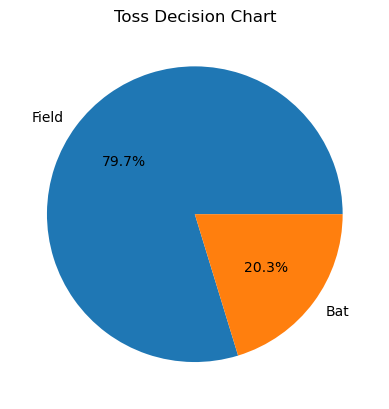

In [167]:
plt.pie(
    toss_count, 
    labels = toss_count.index,
    autopct= '%1.1f%%'
)
plt.title("Toss Decision Chart")
plt.show()

In [168]:
data.groupby(['toss_winner', 'toss_decision']).size()

toss_winner  toss_decision
Banglore     Bat              2
             Field            6
Chennai      Bat              2
             Field            4
Delhi        Field            8
Gujarat      Bat              4
             Field            6
Hyderabad    Bat              1
             Field            9
Kolkata      Bat              1
             Field            7
Lucknow      Bat              2
             Field            5
Mumbai       Field            9
Punjab       Bat              1
             Field            3
Rajasthan    Bat              2
             Field            2
dtype: int64

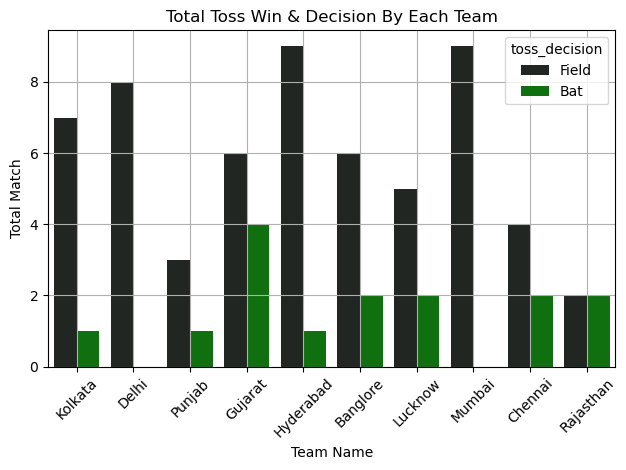

In [169]:
sns.countplot(x = 'toss_winner', data = data, palette='dark:green', hue='toss_decision')
plt.title("Total Toss Win & Decision By Each Team")
plt.xlabel("Team Name")
plt.xticks(rotation = 45)
plt.ylabel("Total Match")
plt.tight_layout()
plt.grid(True)
plt.show()

In [170]:
per = (data['toss_winner'] == data['match_winner']).value_counts(normalize=True)
per

False    0.513514
True     0.486486
Name: proportion, dtype: float64

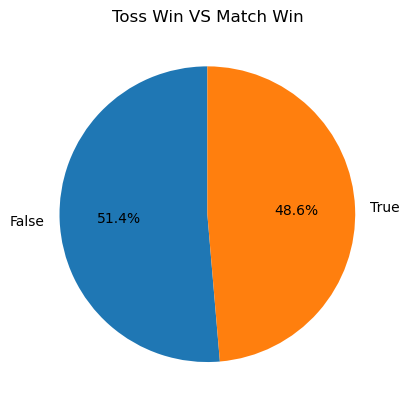

In [171]:
plt.pie(
    per,
    labels=per.index, 
    autopct= "%1.1f%%", 
    startangle=90
)
plt.title("Toss Win VS Match Win")
plt.show()

## Match Win

In [172]:
match_win = data['match_winner'].value_counts()
match_win

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

C:\Users\afaqu\AppData\Local\Temp\ipykernel_25496\281803919.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = match_win.index, y=match_win.values, palette='viridis')


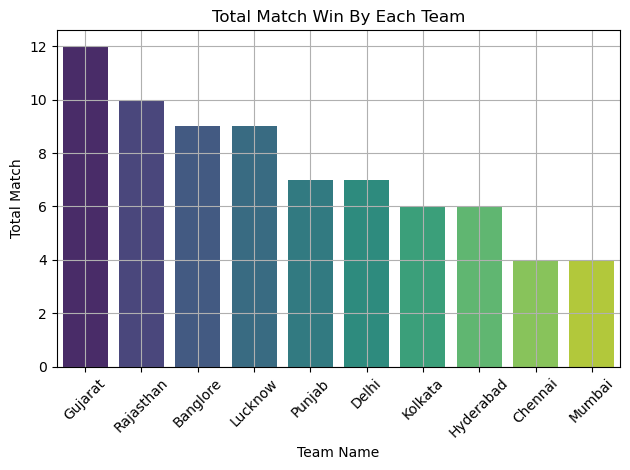

In [173]:
sns.barplot(x = match_win.index, y=match_win.values, palette='viridis')
plt.title("Total Match Win By Each Team")
plt.xlabel("Team Name")
plt.xticks(rotation = 45)
plt.ylabel("Total Match")
plt.tight_layout()
plt.grid(True)
plt.show()

In [174]:
wonby = data['won_by'].value_counts()
wonby

won_by
Wickets    37
Runs       37
Name: count, dtype: int64

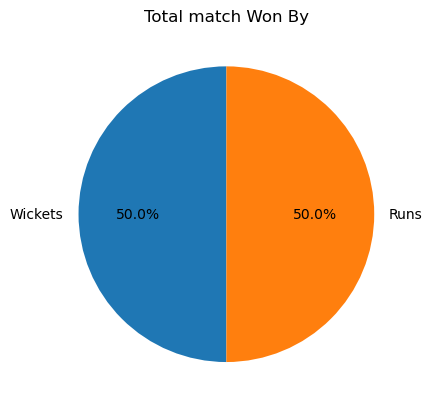

In [175]:
plt.pie(
    wonby, 
    labels = wonby.index, 
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Total match Won By")
plt.show()

### first and second innings score

In [176]:
first_ining_score = data.groupby('team1')['first_ings_score'].agg(
    High_Score = 'max',
    Low_Score = 'min',
    Avg_Score = 'mean'
)
first_ining_score

,High_Score,Low_Score,Avg_Score
team1,,,
Banglore,216,68,170.437500
Chennai,210,97,164.666667
Delhi,222,115,172.916667
Gujarat,195,130,169.000000
Hyderabad,210,151,176.000000
Kolkata,217,137,174.000000
Lucknow,199,144,167.833333
Mumbai,198,158,183.000000
Punjab,189,189,189.000000


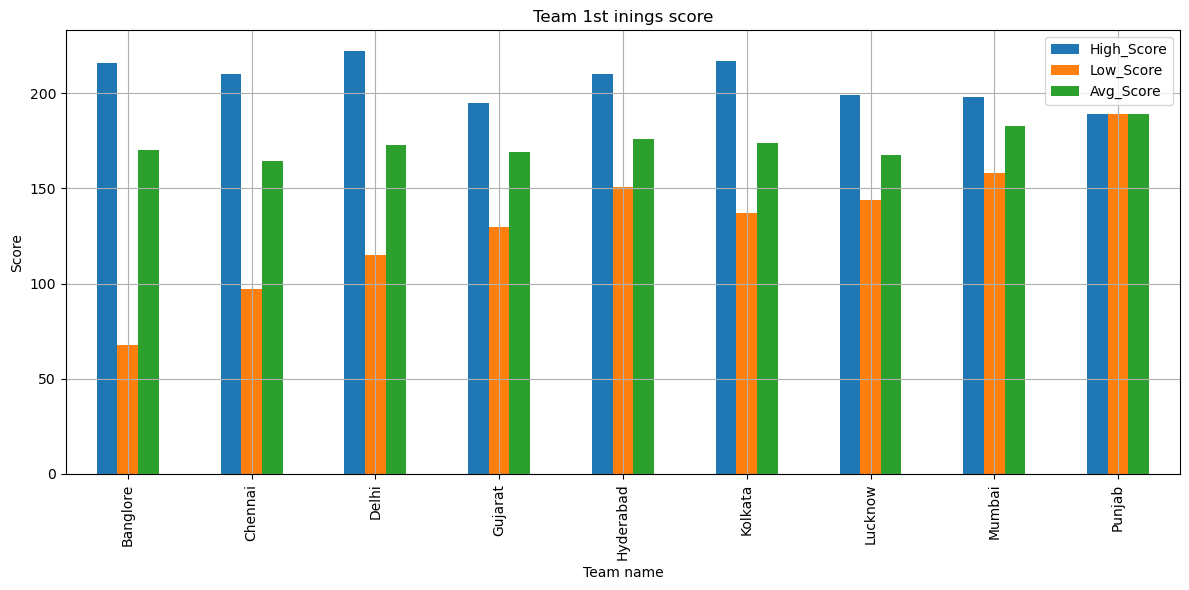

In [177]:
first_ining_score.plot(kind='bar', figsize=(12,6))
plt.title("Team 1st inings score")
plt.xlabel('Team name')
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [178]:
second_ining_score = data.groupby('team2')['second_ings_score'].agg(
    High_Score = 'max',
    Low_Score = 'min',
    Avg_Score = 'mean'
)
second_ining_score

,High_Score,Low_Score,Avg_Score
team2,,,
Chennai,193,160,176.500000
Delhi,173,117,145.000000
Gujarat,174,82,148.333333
Hyderabad,199,72,156.285714
Kolkata,176,123,147.571429
Lucknow,211,101,170.888889
Mumbai,190,103,154.545455
Punjab,208,119,156.384615
Rajasthan,210,115,164.764706


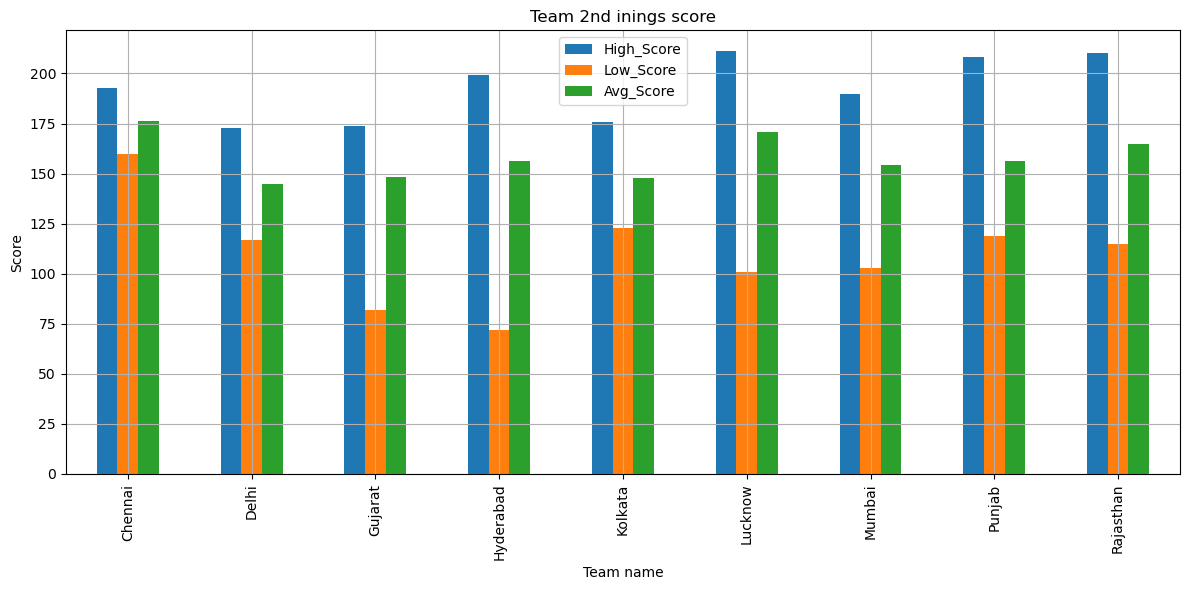

In [179]:
second_ining_score.plot(kind='bar', figsize=(12,6))
plt.title("Team 2nd inings score")
plt.xlabel('Team name')
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()

## Most player of the match awards

In [180]:
pom = data['player_of_the_match'].value_counts().head(10)
pom

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
Name: count, dtype: int64

C:\Users\afaqu\AppData\Local\Temp\ipykernel_25496\1788189211.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = pom.index, x = pom.values, palette="rainbow")


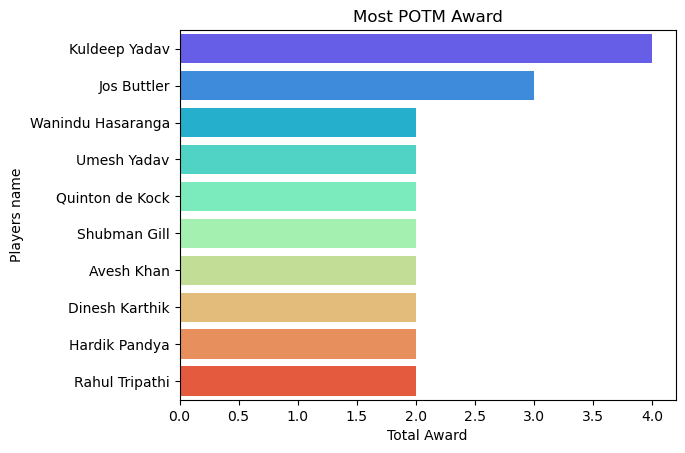

In [181]:
sns.barplot(y = pom.index, x = pom.values, palette="rainbow")
plt.title("Most POTM Award")
plt.xlabel("Total Award")
plt.ylabel("Players name")
plt.show()

# Most Time Highest_Scorers

In [182]:
top10 = data.groupby('top_scorer')['highscore'].count().nlargest(10)
top10

top_scorer
Jos Buttler         7
Quinton de Kock     5
KL Rahul            4
Liam Livingstone    4
Shubman Gill        4
David Warner        3
Faf du Plessis      3
Ishan Kishan        3
W. Saha             3
Abhishek Sharma     2
Name: highscore, dtype: int64

C:\Users\afaqu\AppData\Local\Temp\ipykernel_25496\1257993019.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top10.index, x = top10.values, palette='colorblind')


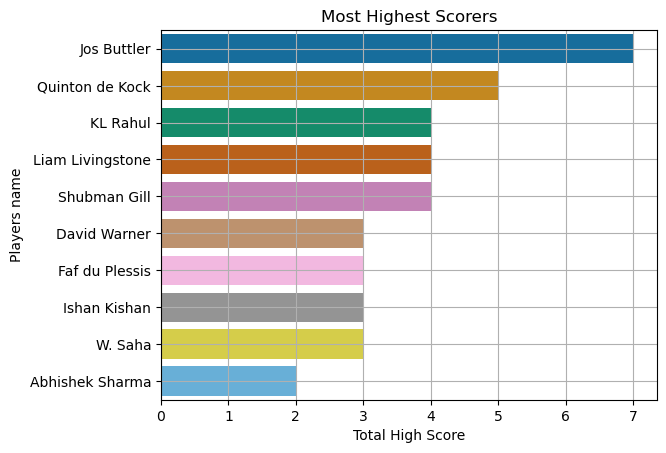

In [183]:
sns.barplot(y=top10.index, x = top10.values, palette='colorblind')
plt.title("Most Highest Scorers")
plt.xlabel("Total High Score")
plt.ylabel("Players name")
plt.grid(True)
plt.show()

### Top High Score and Batsman name

In [184]:
hsb = data.nlargest(10, 'highscore')
hsb_n = hsb[["top_scorer", "highscore"]]
print(hsb_n)

         top_scorer  highscore
65  Quinton de Kock        140
33      Jos Buttler        116
71    Rajat Patidar        112
72      Jos Buttler        106
25         KL Rahul        103
29      Jos Buttler        103
36         KL Rahul        103
8       Jos Buttler        100
45  Ruturaj Gaikwad         99
15     Shubman Gill         96


## Most Time Highest Wicket Taker

In [185]:
data['Highest_wkt'] = data['best_bowling_figure'].apply(lambda x : x.split('--')[0])
data['Highest_wkt']  = data['Highest_wkt'].astype(int)

bestbowl = data.groupby('best_bowling')['Highest_wkt'].count().nlargest(10)
bestbowl

best_bowling
Yuzvendra Chahal    5
Rashid Khan         4
Avesh Khan          3
Jasprit Bumrah      3
Josh Hazlewood      3
Kagiso Rabada       3
Kuldeep Yadav       3
T Natarajan         3
Andre Russell       2
Daniel Sams         2
Name: Highest_wkt, dtype: int64

C:\Users\afaqu\AppData\Local\Temp\ipykernel_25496\3755860341.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y= bestbowl.index, x = bestbowl.values, palette='deep')


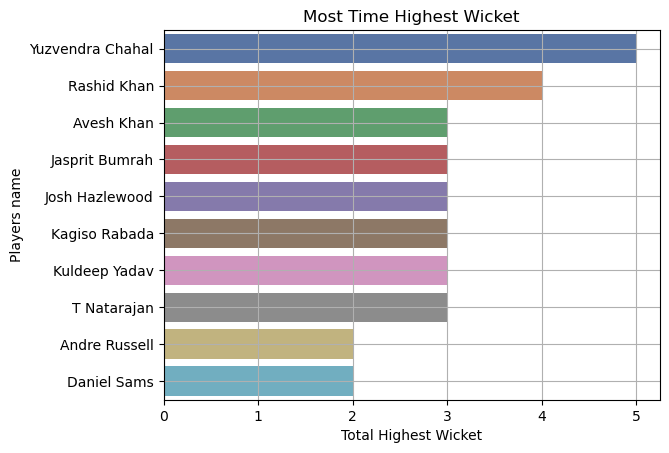

In [186]:
sns.barplot(y= bestbowl.index, x = bestbowl.values, palette='deep')
plt.title("Most Time Highest Wicket")
plt.xlabel("Total Highest Wicket")
plt.ylabel("Players name")
plt.grid(True)
plt.show()

## Best Bowling Figure

In [187]:
hwb = data.nlargest(10, 'Highest_wkt')
print(hwb[["best_bowling", "best_bowling_figure"]])

         best_bowling best_bowling_figure
29   Yuzvendra Chahal               5--40
39        Umran Malik               5--25
53  Wanindu Hasaranga               5--18
55     Jasprit Bumrah               5--10
5   Wanindu Hasaranga               4--20
7         Umesh Yadav               4--23
9     Lockie Ferguson               4--28
11         Avesh Khan               4--24
18      Kuldeep Yadav               4--35
19   Yuzvendra Chahal               4--41


### Top 10 Highest margin by run

In [189]:
margin_by_runs = data[data['won_by'] == 'Runs'].sort_values(by = 'margin', ascending=False)
top10mbr = margin_by_runs[['match_winner', 'margin']].head(10)
top10mbr

,match_winner,margin
54,Chennai,91
52,Lucknow,75
53,Banglore,67
56,Gujarat,62
4,Rajasthan,61
60,Kolkata,54
59,Punjab,54
10,Punjab,54
55,Kolkata,52
18,Delhi,44


### Top 10 highest margin by wicket

In [190]:
margin_by_wkt = data[data['won_by'] == 'Wickets'].sort_values(by = 'margin', ascending=False)
top10mbw = margin_by_wkt[['match_winner', 'margin']].head(10)
top10mbw

,match_winner,margin
31,Delhi,9
35,Hyderabad,9
16,Hyderabad,8
20,Hyderabad,8
47,Punjab,8
57,Delhi,8
66,Banglore,8
73,Gujarat,7
70,Gujarat,7
46,Kolkata,7
